In [15]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')



import warnings
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Read data into a DataFrame.
data_url = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Sales ~ TV+Radio+Newspaper'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.58e-96
Time:                        08:56:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


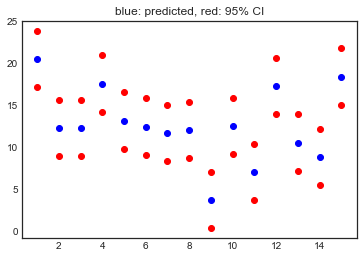

In [7]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [10]:

lm.fittedvalues[0:15]
iv_l

1      17.158283
2       8.981672
3       8.919038
4      14.246273
5       9.825762
6       9.076283
7       8.381790
8       8.783659
9       0.352614
10      9.198405
11      3.681774
12     13.932358
13      7.202851
14      5.478045
15     15.093215
16     17.460871
17      9.359072
18     19.858903
19      6.610278
20     10.830901
21     14.754193
22     11.385267
23      3.123596
24     13.204122
25      4.801664
26     12.246077
27     11.646850
28     13.706910
29     16.063928
30      5.799098
         ...    
171     4.047086
172    11.018884
173     4.254582
174     8.626071
175    10.388347
176    21.412918
177    16.629685
178     8.816678
179    12.641022
180     9.044170
181     7.235717
182    10.576402
183     3.200814
184    20.748211
185    15.192959
186    17.439381
187     6.341128
188    13.736057
189    15.275044
190     2.696965
191     9.108758
192     5.074531
193     1.099812
194    15.114090
195    13.138008
196     2.011042
197     4.814618
198     9.4389

In [14]:
np.savetxt("sales_pred.csv", lm.fittedvalues, delimiter=",")

In [13]:
data['Sales'].to_csv('sales_actual.csv')

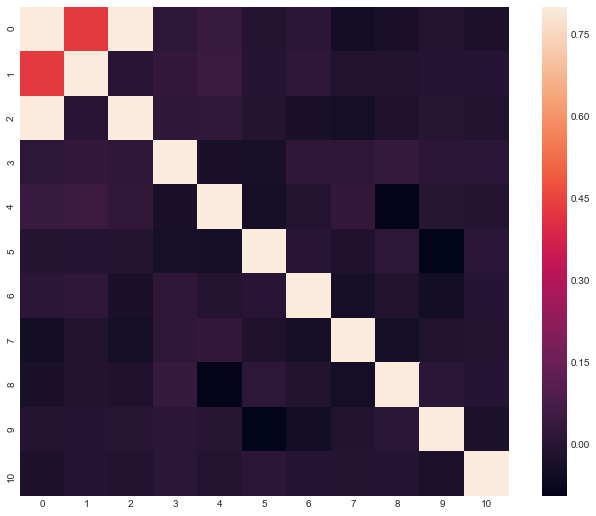

In [16]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8223169753383506
R-squared PLSR: 0.817657597212445
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8222887112112135
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.82231683726715
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169743839257
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169753377718
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169753383499
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169753383506
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169753383506
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169753383506
R-squared regression: 0.8223169753383506
R-squared PLSR: 0.8223169753383506


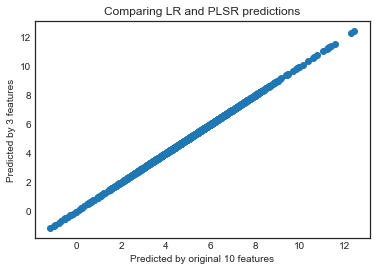

In [28]:
num_components = 1
while num_components <= 10:
    
    'Num compon{1}'.format(num_components)
    print({}.format(''))
    # Fit a linear model with all 10 features.
    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    # Save predicted values.
    Y_pred = regr.predict(X)
    print('R-squared regression:', regr.score(X, y))

    # Fit a linear model using Partial Least Squares Regression.
    # Reduce feature space to 3 dimensions.
    pls1 = PLSRegression(n_components=num_components)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('R-squared PLSR:', pls1.score(X, y))
    
    num_components +=1

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8223169743839257


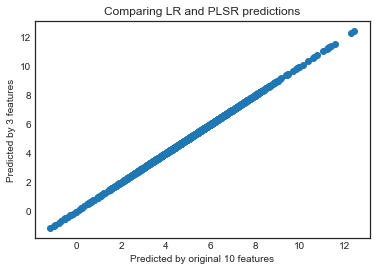

In [18]:
#trying 4
pls1 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8223169753377718


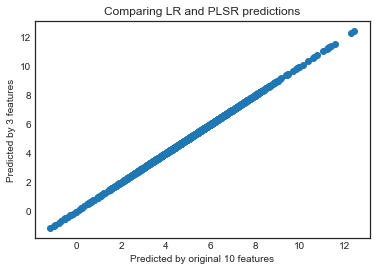

In [19]:
#trying 5
pls1 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8223169753383499


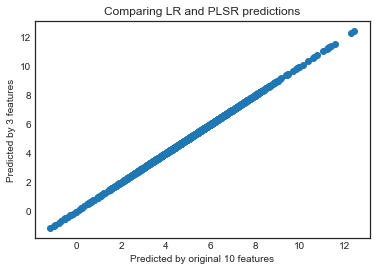

In [20]:
#trying 6
pls1 = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8223169753383506


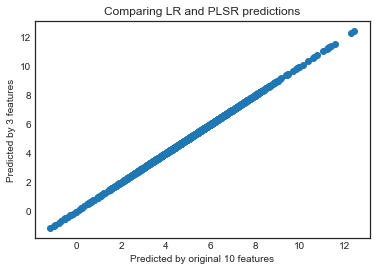

In [26]:
#trying 7
pls1 = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()